# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* x : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 10 + 2.5 * x  + e
* e estará distribuida segun una N(0, 0.8)

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
x = 1.5 + 2.5 * np.random.randn(100)

In [207]:
res = 0 + 0.8 * np.random.randn(100)

In [208]:
y_pred = 5 + 0.5 * x

In [209]:
y_act = 5 + 0.5 * x + res

In [210]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [211]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [212]:
data.head()

,x,y_actual,y_prediccion
0,3.916124,6.931456,6.958062
1,2.207195,5.727979,6.103598
2,-2.475065,5.138024,3.762468
3,3.784831,6.223033,6.892415
4,1.502409,5.075540,5.751204


In [213]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual VS Predicción')

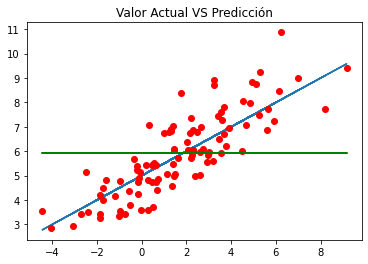

In [214]:
%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.title("Valor Actual VS Predicción")

# ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST: Variabilidad de los datos con respecto de su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberian seguir una distribución normal)
* SSR: Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR/SST, coeficiente de determinación entre 0 y 1

In [215]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [216]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.916124,6.931456,6.958062,1.094584,0.000708,1.039620
1,2.207195,5.727979,6.103598,0.036772,0.141089,0.033804
2,-2.475065,5.138024,3.762468,4.619795,1.892157,0.598788
3,3.784831,6.223033,6.892415,0.961532,0.448072,0.096842
4,1.502409,5.075540,5.751204,0.025803,0.456522,0.699395


In [217]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [218]:
SSR

166.38666075142095

In [219]:
SSD

83.98823033581232

In [220]:
SST

276.9197328155623

In [221]:
SSD+SSR

250.37489108723327

In [222]:
R2 = SSR/SST

In [223]:
R2

0.6008479751865136

(array([ 2.,  3.,  1., 10., 10., 15., 21., 18., 11.,  9.]),
 array([-2.76349554, -2.3333404 , -1.90318525, -1.47303011, -1.04287497,
        -0.61271983, -0.18256468,  0.24759046,  0.6777456 ,  1.10790074,
         1.53805588]),
 <BarContainer object of 10 artists>)

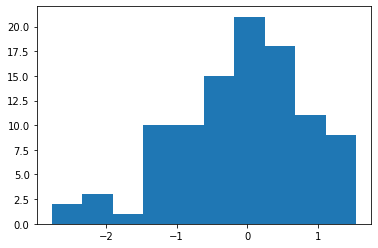

In [224]:
plt.hist(data["y_prediccion"] - data["y_actual"])

# Obteniendo la recta de regresion
* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m))/ sum((xi - x_m)²)
* a = y_m - b * x_m

In [225]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.685825133484255, 5.911838296785424)

In [226]:
data["beta_numerador"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_denominador"] = (data["x"] - x_mean)**2

In [227]:
beta = sum(data["beta_numerador"])/sum(data["beta_denominador"])

In [228]:
alpha = y_mean - beta * x_mean

In [229]:
alpha, beta

(4.9990816769940425, 0.5414301884946398)

### El modelo lineal  obtenido por regresión es:
* y = 9.928364957035443 + 2.5085646596267255 * x

In [230]:
data["y_model"] = alpha + beta * data["x"]

In [231]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,y_model
0,3.916124,6.931456,6.958062,1.094584,0.000708,1.039620,2.274052,4.974234,7.119390
1,2.207195,5.727979,6.103598,0.036772,0.141089,0.033804,-0.095859,0.271827,6.194124
2,-2.475065,5.138024,3.762468,4.619795,1.892157,0.598788,3.219754,17.313006,3.659007
3,3.784831,6.223033,6.892415,0.961532,0.448072,0.096842,0.653200,4.405825,7.048303
4,1.502409,5.075540,5.751204,0.025803,0.456522,0.699395,0.153391,0.033642,5.812531


In [232]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - np.mean(y_act))**2)

In [233]:
SSR, SSD, SST

(194.5457008478007, 82.37403196776177, 276.9197328155623)

In [234]:
R2 = SSR / SST
R2

0.7025346257190511

Text(0.5, 1.0, 'Valor Actual VS Predicción')

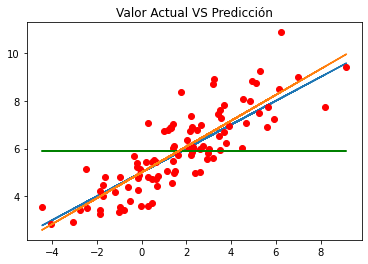

In [235]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"] )
plt.title("Valor Actual VS Predicción")

# Error estándar de los residuos (RSE)

In [236]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.9168158738862531

In [238]:
np.mean(data["y_actual"])

5.911838296785424

In [239]:
RSE / np.mean(data["y_actual"])

0.15508135166429937